In [92]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [93]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [94]:
NUM_CLASSES = 4

# 学習データ読み込み

In [95]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [96]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [98]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [99]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 42)                0         
                                                                 
 dense_15 (Dense)            (None, 20)                860       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dense_17 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [100]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [101]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [102]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/27 [=======================>......] - ETA: 0s - loss: 1.4078 - accuracy: 0.2951
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 1s 10ms/step - loss: 1.3974 - accuracy: 0.3056 - val_loss: 1.3104 - val_accuracy: 0.4192
Epoch 2/1000
22/27 [=======================>......] - ETA: 0s - loss: 1.3019 - accuracy: 0.3995
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 10ms/step - loss: 1.2944 - accuracy: 0.4076 - val_loss: 1.2181 - val_accuracy: 0.6098
Epoch 3/1000
26/27 [===========================>..] - ETA: 0s - loss: 1.2163 - accuracy: 0.4492
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 1.2144 - accuracy: 0.4518 - val_loss: 1.1217 - val_accuracy: 0.6696
Epoch 4/1000
23/27 [========================>.....] - ETA: 0s - loss: 1.1460 - accuracy: 0.4956

22/27 [=======================>......] - ETA: 0s - loss: 0.6197 - accuracy: 0.7536
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 0.6232 - accuracy: 0.7521 - val_loss: 0.3597 - val_accuracy: 0.9218
Epoch 29/1000
15/27 [===============>..............] - ETA: 0s - loss: 0.6105 - accuracy: 0.7693
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 0.6174 - accuracy: 0.7662 - val_loss: 0.3537 - val_accuracy: 0.9192
Epoch 30/1000
13/27 [=============>................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7728
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.6281 - accuracy: 0.7636 - val_loss: 0.3482 - val_accuracy: 0.9139
Epoch 31/1000
16/27 [================>.............] - ETA: 0s - loss: 0.6218 - accuracy: 0.7720
Epoch 31

27/27 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7958
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 0.5372 - accuracy: 0.7958 - val_loss: 0.2588 - val_accuracy: 0.9306
Epoch 56/1000
16/27 [================>.............] - ETA: 0s - loss: 0.5802 - accuracy: 0.7852
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.5484 - accuracy: 0.7961 - val_loss: 0.2594 - val_accuracy: 0.9323
Epoch 57/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.5523 - accuracy: 0.7913
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.5244 - accuracy: 0.7993 - val_loss: 0.2614 - val_accuracy: 0.9253
Epoch 58/1000
17/27 [=================>............] - ETA: 0s - loss: 0.5130 - accuracy: 0.8038
Epoch 58

19/27 [====================>.........] - ETA: 0s - loss: 0.4779 - accuracy: 0.8224
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4847 - accuracy: 0.8180 - val_loss: 0.2204 - val_accuracy: 0.9411
Epoch 83/1000
15/27 [===============>..............] - ETA: 0s - loss: 0.5056 - accuracy: 0.8115
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 0.4936 - accuracy: 0.8219 - val_loss: 0.2238 - val_accuracy: 0.9367
Epoch 84/1000
24/27 [=========================>....] - ETA: 0s - loss: 0.4898 - accuracy: 0.8174
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4912 - accuracy: 0.8139 - val_loss: 0.2257 - val_accuracy: 0.9367
Epoch 85/1000
15/27 [===============>..............] - ETA: 0s - loss: 0.5267 - accuracy: 0.8151
Epoch 85

16/27 [================>.............] - ETA: 0s - loss: 0.4558 - accuracy: 0.8296
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4727 - accuracy: 0.8230 - val_loss: 0.1963 - val_accuracy: 0.9482
Epoch 110/1000
18/27 [===================>..........] - ETA: 0s - loss: 0.4799 - accuracy: 0.8212
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 0.4748 - accuracy: 0.8233 - val_loss: 0.1980 - val_accuracy: 0.9464
Epoch 111/1000
22/27 [=======================>......] - ETA: 0s - loss: 0.4614 - accuracy: 0.8263
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4540 - accuracy: 0.8318 - val_loss: 0.1957 - val_accuracy: 0.9517
Epoch 112/1000
27/27 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.8265
Ep

Epoch 136/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.4784 - accuracy: 0.8192
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4643 - accuracy: 0.8277 - val_loss: 0.1857 - val_accuracy: 0.9490
Epoch 137/1000
17/27 [=================>............] - ETA: 0s - loss: 0.4463 - accuracy: 0.8272
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4369 - accuracy: 0.8286 - val_loss: 0.1765 - val_accuracy: 0.9552
Epoch 138/1000
13/27 [=============>................] - ETA: 0s - loss: 0.4829 - accuracy: 0.8155
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4621 - accuracy: 0.8268 - val_loss: 0.1825 - val_accuracy: 0.9464
Epoch 139/1000
17/27 [=================>............] - ETA: 0s - loss: 0.4567 - accu

Epoch 163/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.4077 - accuracy: 0.8426
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4183 - accuracy: 0.8380 - val_loss: 0.1786 - val_accuracy: 0.9482
Epoch 164/1000
16/27 [================>.............] - ETA: 0s - loss: 0.4471 - accuracy: 0.8262
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4366 - accuracy: 0.8309 - val_loss: 0.1717 - val_accuracy: 0.9569
Epoch 165/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.4589 - accuracy: 0.8287
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4478 - accuracy: 0.8292 - val_loss: 0.1682 - val_accuracy: 0.9622
Epoch 166/1000
17/27 [=================>............] - ETA: 0s - loss: 0.4076 - accu

Epoch 190/1000
19/27 [====================>.........] - ETA: 0s - loss: 0.4338 - accuracy: 0.8376
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4300 - accuracy: 0.8394 - val_loss: 0.1652 - val_accuracy: 0.9605
Epoch 191/1000
20/27 [=====================>........] - ETA: 0s - loss: 0.4158 - accuracy: 0.8527
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4196 - accuracy: 0.8523 - val_loss: 0.1701 - val_accuracy: 0.9569
Epoch 192/1000
17/27 [=================>............] - ETA: 0s - loss: 0.4226 - accuracy: 0.8451
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4222 - accuracy: 0.8456 - val_loss: 0.1662 - val_accuracy: 0.9596
Epoch 193/1000
18/27 [===================>..........] - ETA: 0s - loss: 0.4299 - accu

Epoch 217/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.4657 - accuracy: 0.8292
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 0.4465 - accuracy: 0.8330 - val_loss: 0.1605 - val_accuracy: 0.9613
Epoch 218/1000
16/27 [================>.............] - ETA: 0s - loss: 0.4325 - accuracy: 0.8452
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4294 - accuracy: 0.8430 - val_loss: 0.1631 - val_accuracy: 0.9596
Epoch 219/1000
13/27 [=============>................] - ETA: 0s - loss: 0.4240 - accuracy: 0.8419
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.4217 - accuracy: 0.8453 - val_loss: 0.1588 - val_accuracy: 0.9596
Epoch 220/1000
15/27 [===============>..............] - ETA: 0s - loss: 0.4169 - accu

Epoch 244/1000
17/27 [=================>............] - ETA: 0s - loss: 0.4107 - accuracy: 0.8460
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.3926 - accuracy: 0.8541 - val_loss: 0.1504 - val_accuracy: 0.9675
Epoch 245/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.4265 - accuracy: 0.8465
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4056 - accuracy: 0.8512 - val_loss: 0.1525 - val_accuracy: 0.9622
Epoch 246/1000
22/27 [=======================>......] - ETA: 0s - loss: 0.4179 - accuracy: 0.8398
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8435 - val_loss: 0.1482 - val_accuracy: 0.9649
Epoch 247/1000
24/27 [=========================>....] - ETA: 0s - loss: 0.4172 - accu

Epoch 271/1000
21/27 [======================>.......] - ETA: 0s - loss: 0.4069 - accuracy: 0.8393
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4019 - accuracy: 0.8412 - val_loss: 0.1491 - val_accuracy: 0.9719
Epoch 272/1000
18/27 [===================>..........] - ETA: 0s - loss: 0.4002 - accuracy: 0.8451
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.3853 - accuracy: 0.8523 - val_loss: 0.1459 - val_accuracy: 0.9701
Epoch 273/1000
21/27 [======================>.......] - ETA: 0s - loss: 0.4040 - accuracy: 0.8441
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.3944 - accuracy: 0.8506 - val_loss: 0.1481 - val_accuracy: 0.9719
Epoch 274/1000
21/27 [======================>.......] - ETA: 0s - loss: 0.4064 - accu

Epoch 298/1000
27/27 [==============================] - ETA: 0s - loss: 0.4018 - accuracy: 0.8409
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 0.4018 - accuracy: 0.8409 - val_loss: 0.1486 - val_accuracy: 0.9719
Epoch 299/1000
14/27 [==============>...............] - ETA: 0s - loss: 0.3887 - accuracy: 0.8583
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.3943 - accuracy: 0.8535 - val_loss: 0.1458 - val_accuracy: 0.9710
Epoch 300/1000
16/27 [================>.............] - ETA: 0s - loss: 0.4237 - accuracy: 0.8442
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.4053 - accuracy: 0.8488 - val_loss: 0.1497 - val_accuracy: 0.9675
Epoch 301/1000
18/27 [===================>..........] - ETA: 0s - loss: 0.3903 - accu

In [103]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9666


In [104]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [105]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 50ms/step
[0.7899263  0.15333861 0.04886697 0.00786807]
0


# 混同行列

36/36 [==============================] - 0s 1ms/step


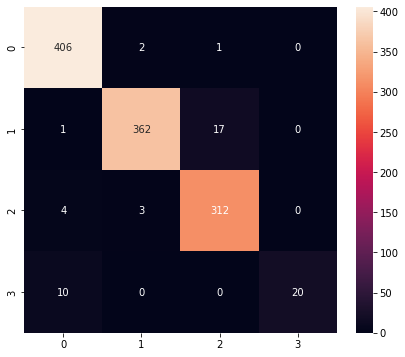

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       409
           1       0.99      0.95      0.97       380
           2       0.95      0.98      0.96       319
           3       1.00      0.67      0.80        30

    accuracy                           0.97      1138
   macro avg       0.97      0.90      0.93      1138
weighted avg       0.97      0.97      0.97      1138



In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [107]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [108]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1j658vxa\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp1j658vxa\assets


6552

# 推論テスト

In [109]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [110]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [111]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [112]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [113]:

print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.78992635 0.1533386  0.04886696 0.00786807]
0
